In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import time


from Graph import Graph


class Queue:
    def __init__(self, data=[]):
        self.data = data

    def push(self, value):
        self.data.append(value)

    def pop(self):
        return self.data.pop(0)


class Stack:
    def __init__(self, data=[]):
        self.data = data

    def push(self, value):
        self.data.append(value)

    def pop(self):
        return self.data.pop()


class Comparer:
    def __init__(self, graph_size: int, start_vertex: int, p: float):
        self.graph = Graph(graph_size)
        self.start_vertex = start_vertex
        self.proability = p

        self.graph.random_graph_Erdos_Renyi(self.proability)
        self.graph_list = self.graph.convertator('list')

        self.queue = Queue([self.start_vertex])
        self.stack = Stack([self.start_vertex])
        self.way_DFS = []
        self.way_BFS = []
        self.visited_DFS = [False for _ in range(self.graph.number_of_vertices)]
        self.visited_BFS = [False for _ in range(self.graph.number_of_vertices)]

    def DFS(self, stack: Stack):
        if not stack.data:
            return self.way_DFS

        vertex = stack.pop()
        self.visited_DFS[vertex] = True
        self.way_DFS.append(vertex)

        for second_vertex in self.graph_list[vertex]:
            if not self.visited_DFS[second_vertex]:
                self.visited_DFS[second_vertex] = True
                stack.push(second_vertex)

        return self.DFS(stack)

    def BFS(self, queue: Queue):
        if not queue.data:
            return self.way_BFS

        vertex = queue.pop()
        self.visited_BFS[vertex] = True
        self.way_BFS.append(vertex)

        for second_vertex in self.graph_list[vertex]:
            if not self.visited_BFS[second_vertex]:
                self.visited_BFS[second_vertex] = True
                queue.push(second_vertex)

        return self.BFS(queue)

    def __str__(self):
        return f"Graph size: {self.graph.number_of_vertices}\nStart vertex: {self.start_vertex}\nProability: {self.proability}"


In [7]:
if __name__ == '__main__':
    numbers = 200
    step = 5
    samples = 100

    numbers_range = np.arange(5, numbers + 1, step)
    probabilities = np.arange(0, 1 + 0.1, 0.1)

    dfs_by_range = []
    bfs_by_range = []

    for number in numbers_range:
        print(f"Size: {number}")
        dfs_by_probability = []
        bfs_by_probability = []
        for probability in probabilities:
            dfs_time = []
            bfs_time = []
            for _ in range(samples):
                compare = Comparer(number, 0, probability)
                start = time.time()
                compare.DFS(compare.stack)
                end = time.time()
                dfs_time.append(end - start)
                start = time.time()
                compare.BFS(compare.queue)
                end = time.time()
                bfs_time.append(end - start)
            dfs_by_probability.append(np.mean(dfs_time))
            bfs_by_probability.append(np.mean(bfs_time))
        dfs_by_range.append(dfs_by_probability)
        bfs_by_range.append(bfs_by_probability)


Size: 5
Size: 10
Size: 15
Size: 20
Size: 25
Size: 30
Size: 35
Size: 40
Size: 45
Size: 50
Size: 55
Size: 60
Size: 65
Size: 70
Size: 75
Size: 80
Size: 85
Size: 90
Size: 95
Size: 100
Size: 105
Size: 110
Size: 115
Size: 120
Size: 125
Size: 130
Size: 135
Size: 140
Size: 145
Size: 150
Size: 155
Size: 160
Size: 165
Size: 170
Size: 175
Size: 180
Size: 185
Size: 190
Size: 195
Size: 200


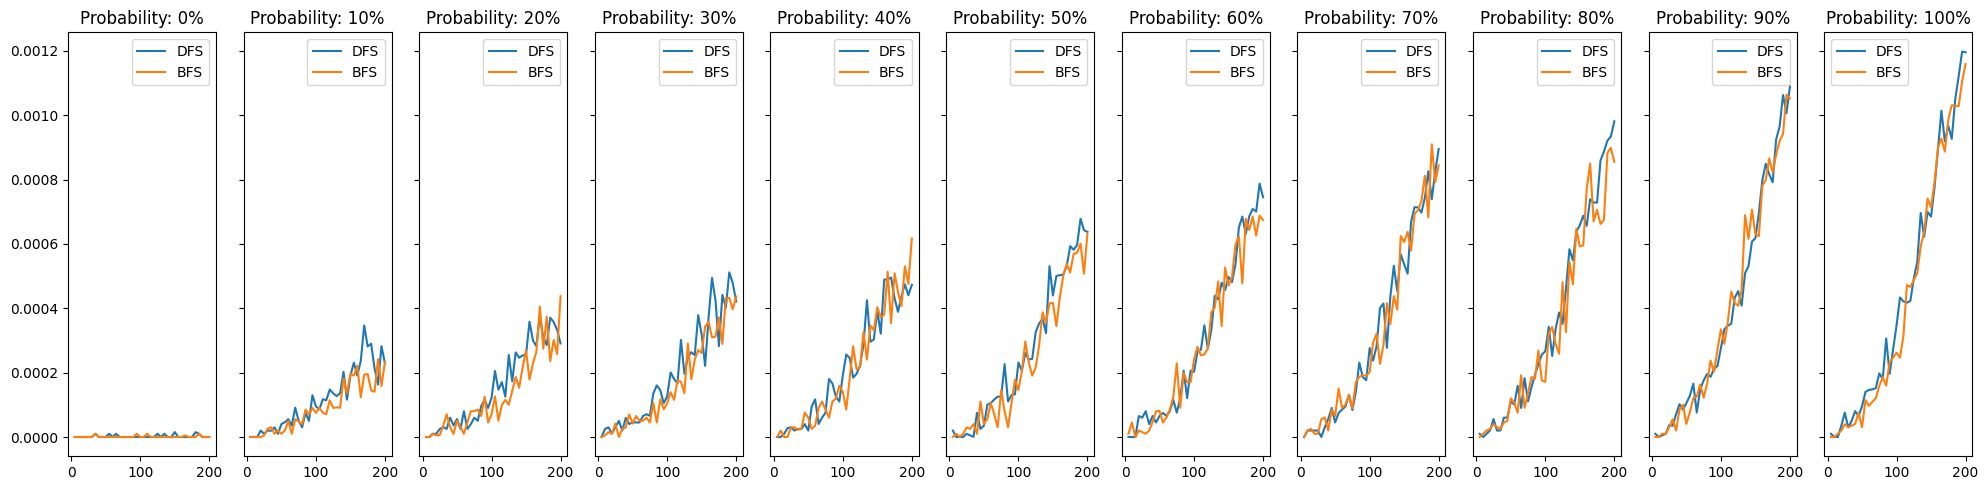

In [24]:

fig, ax = plt.subplots(1, len(probabilities), sharey=True, figsize=(20, 5))
for probability_index in range(len(probabilities)):
    times_dfs = np.array(dfs_by_range)[:, probability_index]
    times_bfs = np.array(bfs_by_range)[:, probability_index]
    ax[probability_index].plot(numbers_range, times_dfs, label=f"DFS")
    ax[probability_index].plot(numbers_range, times_bfs, label=f"BFS")
    ax[probability_index].legend()
    ax[probability_index].set_title(f"Probability: {int(probabilities[probability_index]*100)}%")
plt.tight_layout()
plt.show()


In [66]:
dfs_by = np.array([np.array(dfs_by_range)[:, 0]])
for probability_index in range(1, len(probabilities)):
    dfs_by = np.concatenate((dfs_by, np.array([np.array(dfs_by_range)[:, probability_index]])), axis=0)
data_dfs = pd.DataFrame(dfs_by, index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], columns=numbers_range)
data_dfs = data_dfs*10**5

In [67]:
bfs_by = np.array([np.array(bfs_by_range)[:, 0]])
for probability_index in range(1, len(probabilities)):
    bfs_by = np.concatenate((bfs_by, np.array([np.array(bfs_by_range)[:, probability_index]])), axis=0)
data_bfs = pd.DataFrame(bfs_by, index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], columns=numbers_range)
data_bfs = data_bfs*10**5

In [68]:
import seaborn as sns

<Axes: >

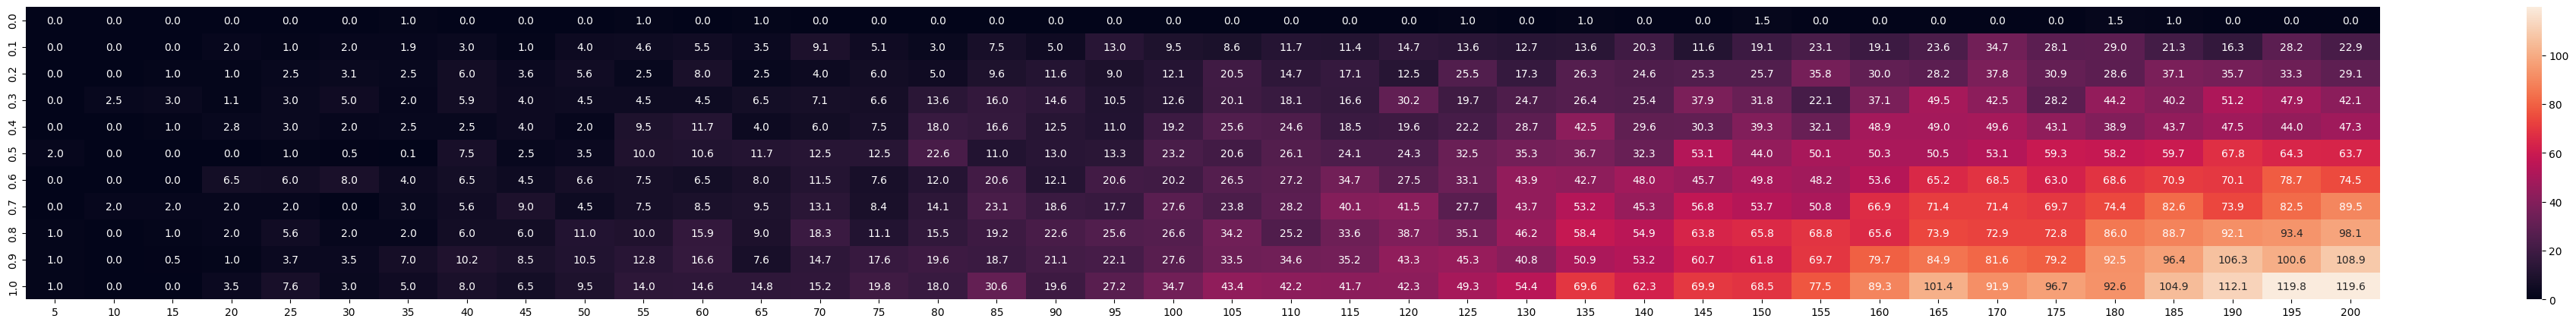

In [69]:
plt.figure(figsize=(50, 5))
sns.heatmap(data_dfs, annot=True, fmt=".1f")

<Axes: >

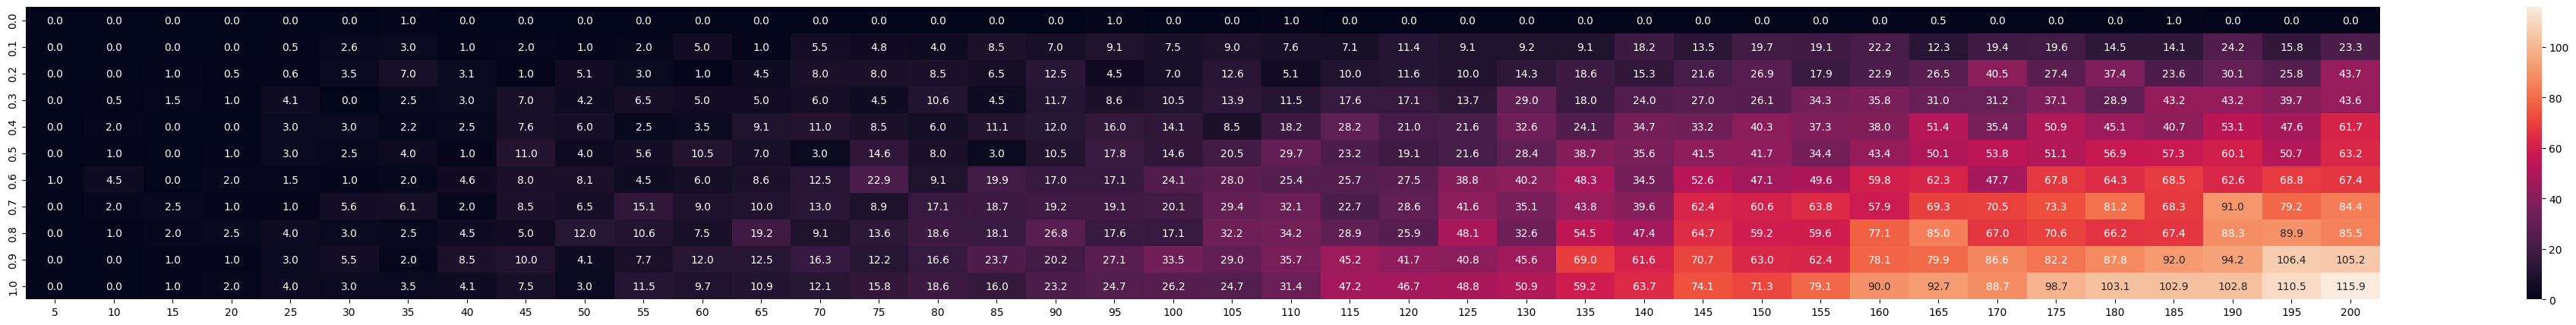

In [70]:
plt.figure(figsize=(50, 5))
sns.heatmap(data_bfs, annot=True, fmt=".1f")